In [1]:
pip install pandasql

     ---------------------------------------- 2.1/2.1 MB 583.5 kB/s eta 0:00:00
     ------------------------------------ 292.3/292.3 kB 440.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as psql
import seaborn as sns
%matplotlib inline

In [6]:
drk=pd.read_csv("D:/Datasets/smoking_driking_dataset_Ver01.csv")
drk_bk=drk.copy()
drk.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [7]:
drk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [8]:
drk.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [13]:
drk.shape

(991346, 24)

In [15]:
drk_dup=drk[drk.duplicated(keep='last')]
drk_dup

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
12101,Female,50,155,70,90.8,1.0,1.0,1.0,1.0,150.0,...,150.0,183.0,14.9,1.0,0.8,24.0,22.0,42.0,1.0,N
36972,Female,45,165,65,82.0,1.0,1.0,1.0,1.0,120.0,...,103.0,53.0,13.6,1.0,0.5,17.0,19.0,28.0,1.0,N
39808,Male,50,165,65,77.0,0.8,1.0,1.0,1.0,115.0,...,154.0,71.0,15.3,1.0,0.9,28.0,21.0,29.0,2.0,Y
61934,Male,50,180,95,101.0,1.5,1.5,1.0,2.0,177.0,...,120.0,105.0,15.0,3.0,0.9,19.0,27.0,61.0,3.0,Y
82306,Female,40,170,85,88.0,0.9,0.9,1.0,1.0,120.0,...,121.0,115.0,10.4,1.0,0.9,17.0,14.0,33.0,1.0,N
82607,Male,75,160,60,83.0,1.2,0.7,1.0,1.0,105.0,...,150.0,82.0,16.0,2.0,1.1,27.0,22.0,26.0,1.0,N
99422,Male,55,170,60,83.0,1.5,1.5,1.0,1.0,128.0,...,126.0,294.0,16.7,1.0,1.0,24.0,31.0,26.0,2.0,Y
115929,Male,45,170,75,86.4,1.2,0.7,1.0,1.0,150.0,...,122.0,499.0,14.9,1.0,0.8,23.0,11.0,342.0,3.0,Y
118930,Male,65,170,75,101.1,0.6,0.7,1.0,1.0,130.0,...,109.0,140.0,17.1,1.0,1.0,24.0,31.0,26.0,3.0,N
126538,Male,35,170,95,99.0,1.0,1.2,1.0,1.0,122.0,...,168.0,117.0,15.2,1.0,1.1,16.0,23.0,34.0,2.0,Y


In [16]:
drk1=drk.drop_duplicates()
drk1_bk=drk1
drk1.shape

(991320, 24)

In [17]:
drk1.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [25]:
pip install scikit-learn

     ---------------------------------------- 11.0/11.0 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
drk1['DRK_YN']=LE.fit_transform(drk1[['DRK_YN']])
drk1['sex']=LE.fit_transform(drk1[['sex']])

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8232\1017092411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drk1['DRK_YN']=LE.fit_transform(drk1[['DRK_YN']])
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8232\101

In [27]:
drk1.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [28]:
drk1.corr()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
sex,1.000000,-0.083225,0.722774,0.581707,0.344719,0.099019,0.101522,0.002927,-0.000756,0.176246,...,-0.005209,0.216284,0.669416,0.020182,0.245953,0.092945,0.196752,0.257229,0.590998,0.368721
age,-0.083225,1.000000,-0.398501,-0.195333,0.127175,-0.172098,-0.167682,0.203023,0.198698,0.265532,...,0.029487,0.043553,-0.173090,0.041489,0.022821,0.059405,-0.020508,0.017394,-0.126028,-0.284586
height,0.722774,-0.398501,1.000000,0.668823,0.263937,0.139142,0.138527,-0.081159,-0.082469,0.035025,...,-0.015444,0.137611,0.531904,0.002290,0.171254,0.039206,0.144844,0.162337,0.467306,0.374560
weight,0.581707,-0.195333,0.668823,1.000000,0.637164,0.088908,0.088711,-0.044497,-0.045723,0.250765,...,0.067856,0.283774,0.499496,0.029273,0.153883,0.099659,0.276445,0.221880,0.366488,0.264282
waistline,0.344719,0.127175,0.263937,0.637164,1.000000,0.004516,0.006160,0.033226,0.031004,0.272317,...,0.063413,0.249436,0.291724,0.043131,0.098420,0.096863,0.212267,0.186988,0.205474,0.092992
sight_left,0.099019,-0.172098,0.139142,0.088908,0.004516,1.000000,0.307981,-0.039428,-0.041003,-0.035620,...,0.003016,0.010598,0.085901,-0.010256,0.020309,-0.005427,0.018816,0.013563,0.064196,0.077373
sight_right,0.101522,-0.167682,0.138527,0.088711,0.006160,0.307981,1.000000,-0.040764,-0.038901,-0.033996,...,0.002157,0.012262,0.086849,-0.010900,0.021447,-0.004600,0.018920,0.016493,0.065050,0.074798
hear_left,0.002927,0.203023,-0.081159,-0.044497,0.033226,-0.039428,-0.040764,1.000000,0.536899,0.056068,...,-0.014619,0.002098,-0.036057,0.019756,0.015254,0.011282,-0.007908,0.002992,-0.021244,-0.058338
hear_right,-0.000756,0.198698,-0.082469,-0.045723,0.031004,-0.041003,-0.038901,0.536899,1.000000,0.057417,...,-0.013438,0.002160,-0.036706,0.018240,0.012959,0.010764,-0.008688,0.003546,-0.022339,-0.058238
SBP,0.176246,0.265532,0.035025,0.250765,0.272317,-0.035620,-0.033996,0.056068,0.057417,1.000000,...,0.033613,0.185993,0.166524,0.063507,0.062608,0.081481,0.117615,0.161426,0.084907,0.033145


In [77]:
drk1['DRK_YN'].value_counts()

DRK_YN
0    495844
1    495476
Name: count, dtype: int64

In [79]:
count=drk1['DRK_YN'].value_counts()
print('Class 0:',count[0])
print('Class 1:',count[1])
print('Proportion:',round(count[0]/count[1],2),':1')
print('Total records=',len(drk1))

Class 0: 495844
Class 1: 495476
Proportion: 1.0 :1
Total records= 991320


In [81]:
drk1.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [83]:
seed_value = 42
drk1.sample(frac=1, random_state=seed_value)

# Take a representative sample of 1 lakh records
sample_size = 100000
drk2 = drk1.sample(n=sample_size, random_state=seed_value)

In [85]:
drk2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 857155 to 192668
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               100000 non-null  int32  
 1   age               100000 non-null  int64  
 2   height            100000 non-null  int64  
 3   weight            100000 non-null  int64  
 4   waistline         100000 non-null  float64
 5   sight_left        100000 non-null  float64
 6   sight_right       100000 non-null  float64
 7   hear_left         100000 non-null  float64
 8   hear_right        100000 non-null  float64
 9   SBP               100000 non-null  float64
 10  DBP               100000 non-null  float64
 11  BLDS              100000 non-null  float64
 12  tot_chole         100000 non-null  float64
 13  HDL_chole         100000 non-null  float64
 14  LDL_chole         100000 non-null  float64
 15  triglyceride      100000 non-null  float64
 16  hemoglobin        10

In [87]:
drk2['DRK_YN'].value_counts()

DRK_YN
0    50294
1    49706
Name: count, dtype: int64

In [89]:
count=drk2['DRK_YN'].value_counts()
print('Class 0:',count[0])
print('Class 1:',count[1])
print('Proportion:',round(count[0]/count[1],2),':1')
print('Total records=',len(drk2))

Class 0: 50294
Class 1: 49706
Proportion: 1.01 :1
Total records= 100000


In [91]:
IndepVar=[]
for col in drk2.columns:
  if col!='DRK_YN':
    IndepVar.append(col)
TargetVar='DRK_YN'
x=drk2[IndepVar]
y=drk2[TargetVar]

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70000, 23), (30000, 23), (70000,), (30000,))

In [95]:
from sklearn.preprocessing import MinMaxScaler
cols=['sex','age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right','SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP','SMK_stat_type_cd']
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)
x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

Accuracy: 0.7284333333333334
Precision: 0.7317655078391274
Recall: 0.7182043219375125
F1 Score: 0.7249214977884323
ROC AUC: 0.8055780883060002
Jaccard Index: 0.568530875966529
Logloss: 0.5375736335030514
Cohen's Kappa: 0.4568244438200997
Average Precision: 0.7959751416506428
Brier Loss: 0.18061579784048593
Fowlkes-Mallows Index: 0.6044354172091676
MCC: 0.4569023684934918
Balanced Accuracy: 0.7283973180802954
Balanced Classification Rate (BCR): 0.7283973180802954
Gini Coefficient: 0.6111561766120004


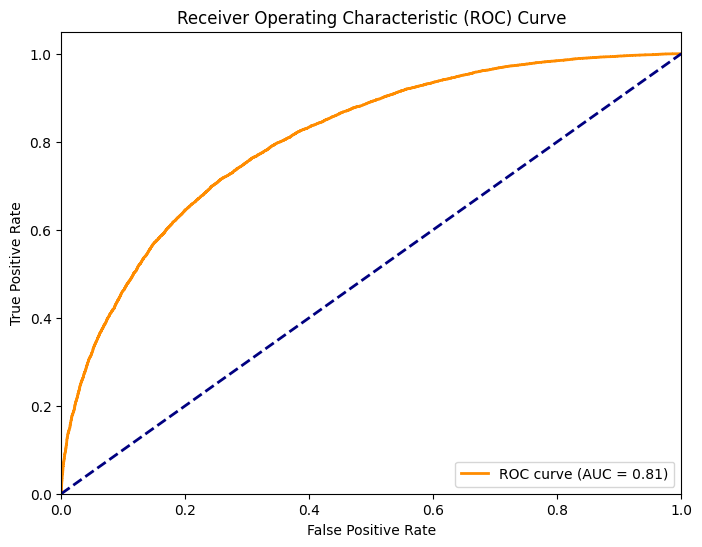

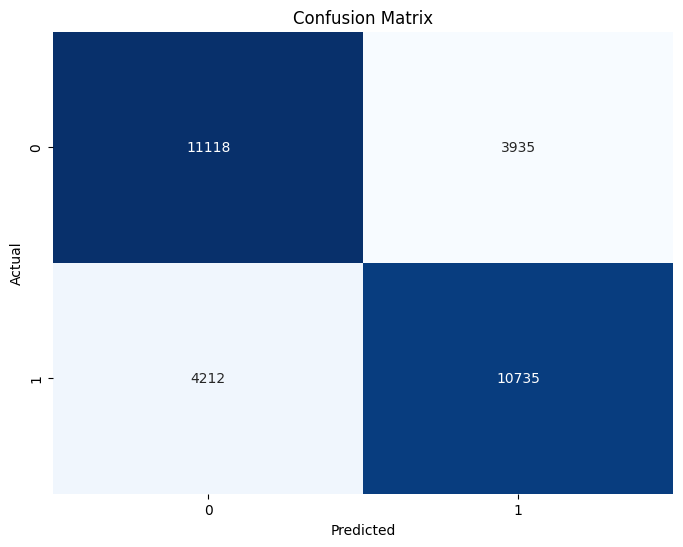

In [97]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, jaccard_score, log_loss, cohen_kappa_score, average_precision_score, brier_score_loss, fowlkes_mallows_score, matthews_corrcoef, balanced_accuracy_score, auc, balanced_accuracy_score, brier_score_loss
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Specify selected features
sel_cols = ['sex', 'age', 'height', 'waistline', 'HDL_chole', 'LDL_chole', 'hemoglobin', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']

def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def balanced_accuracy_score(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return (sensitivity + specificity) / 2

def gini_coefficient(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    area_under_curve = auc(fpr, tpr)
    return 2 * area_under_curve - 1

def balanced_classification_rate(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return (sensitivity + specificity) / 2

# Select only the specified features
x_train_selected = x_train[sel_cols]
x_test_selected = x_test[sel_cols]

# Create Gradient Boosting Classifier with default hyperparameters
model = GradientBoostingClassifier(random_state=42)

# Train the model on the selected features
model.fit(x_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = model.predict(x_test_selected)
y_pred_prob = model.predict_proba(x_test_selected)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
jaccard = jaccard_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_prob)
brier_loss = brier_score_loss(y_test, y_pred_prob)
fowlkes_mallows = fowlkes_mallows_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
bcr = balanced_accuracy_score(y_test, y_pred)
gini = gini_coefficient(y_test, y_pred_prob)


# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Jaccard Index:", jaccard)
print("Logloss:", logloss)
print("Cohen's Kappa:", cohen_kappa)
print("Average Precision:", average_precision)
print("Brier Loss:", brier_loss)
print("Fowlkes-Mallows Index:", fowlkes_mallows)
print("MCC:", mcc)
print("Balanced Accuracy:", balanced_accuracy)
print("Balanced Classification Rate (BCR):", bcr)
print("Gini Coefficient:", gini)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
    jaccard_score, log_loss, cohen_kappa_score, average_precision_score, brier_score_loss, \
    fowlkes_mallows_score, matthews_corrcoef, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load your crop classification dataset (replace 'your_dataset.csv' with your actual dataset file)
# Assume your dataset has features in x and labels in y
# x = ...
# y = ...

# Set the list of k values
k_values = [5, 10, 15, 20]
seed = 42

# Define Gradient Boosting Classifier parameters
gb_params = {
    'n_estimators': 100,  # Number of boosting stages to be run
    'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
    'max_depth': 5,  # Maximum depth of the individual trees
    'subsample': 0.9,  # Fraction of samples used for fitting the individual trees
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
    'min_samples_leaf': 2,  # Minimum number of samples required to be at a leaf node
    'max_features':None
}

# Define a function to calculate various classification metrics
def calculate_metrics(y_true, y_pred_prob, threshold=0.5):
    y_pred = (y_pred_prob >= threshold).astype(int)

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Specificity': specificity_score(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred_prob),
        'Jaccard Index': jaccard_score(y_true, y_pred),
        'Logloss': log_loss(y_true, y_pred_prob),
        'Cohen\'s Kappa': cohen_kappa_score(y_true, y_pred),
        'Average Precision': average_precision_score(y_true, y_pred_prob),
        'Brier Loss': brier_score_loss(y_true, y_pred_prob),
        'Fowlkes-Mallows Index': fowlkes_mallows_score(y_true, y_pred),
        'Gini Coefficient': gini_coefficient(y_true, y_pred_prob),
        'Balanced Classification Rate (BCR)': balanced_classification_rate(y_true, y_pred)
    }

    return metrics

# Define additional metric functions
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def balanced_accuracy_score(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return (sensitivity + specificity) / 2

def gini_coefficient(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    area_under_curve = auc(fpr, tpr)
    return 2 * area_under_curve - 1

def balanced_classification_rate(y_true, y_pred):
    sensitivity = recall_score(y_true, y_pred)
    specificity = specificity_score(y_true, y_pred)
    return (sensitivity + specificity) / 2

# Iterate through each k value
for k in k_values:
    print(f"\nPerforming {k}-fold Cross-Validation")

    # Initialize StratifiedKFold for cross-validation with the current k value
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)

    # Iterate through each fold
    for fold, (train_idx, val_idx) in enumerate(kf.split(x, y)):
        print(f"\nFold {fold + 1}/{k}")

        # Use the provided training and validation sets
        X_train, X_val = x.iloc[train_idx], x.iloc[val_idx]
        Y_train, Y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Initialize Gradient Boosting Classifier
        gb_clf = GradientBoostingClassifier(**gb_params)

        # Train the Gradient Boosting model
        gb_clf.fit(X_train, Y_train)

        # Predict probabilities on the validation set
        y_pred_prob = gb_clf.predict_proba(X_val)[:, 1]

        # Calculate various classification metrics
        metrics = calculate_metrics(Y_val, y_pred_prob)

        # Print the metrics for the current fold
        print("\nMetrics:")
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name}: {metric_value:.4f}")

# This code prints various classification metrics for each fold in each k value.
# You can further customize it based on your specific requirements.


Performing 5-fold Cross-Validation

Fold 1/5

Metrics:
Accuracy: 0.7391
Precision: 0.7335
Recall: 0.7465
F1 Score: 0.7399
Specificity: 0.7319
Balanced Accuracy: 0.7392
MCC: 0.4784
ROC AUC: 0.8249
Jaccard Index: 0.5872
Logloss: 0.5124
Cohen's Kappa: 0.4783
Average Precision: 0.8218
Brier Loss: 0.1709
Fowlkes-Mallows Index: 0.6144
Gini Coefficient: 0.6498
Balanced Classification Rate (BCR): 0.7392

Fold 2/5

Metrics:
Accuracy: 0.7346
Precision: 0.7298
Recall: 0.7399
F1 Score: 0.7348
Specificity: 0.7293
Balanced Accuracy: 0.7346
MCC: 0.4692
ROC AUC: 0.8182
Jaccard Index: 0.5808
Logloss: 0.5193
Cohen's Kappa: 0.4691
Average Precision: 0.8164
Brier Loss: 0.1742
Fowlkes-Mallows Index: 0.6100
Gini Coefficient: 0.6364
Balanced Classification Rate (BCR): 0.7346

Fold 3/5

Metrics:
Accuracy: 0.7385
Precision: 0.7339
Recall: 0.7434
F1 Score: 0.7386
Specificity: 0.7337
Balanced Accuracy: 0.7385
MCC: 0.4771
ROC AUC: 0.8225
Jaccard Index: 0.5856
Logloss: 0.5145
Cohen's Kappa: 0.4770
Average Precisi

In [100]:
pip install scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pickle
import joblib
# Save the trained model as .pkl
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)

# Save the trained model as .joblib
joblib.dump(gb_clf, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, jaccard_score, log_loss, cohen_kappa_score, average_precision_score, brier_score_loss, fowlkes_mallows_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
import pickle
import joblib

# Assume x_train, y_train, x_test, y_test are already defined
# Specify selected features
sel_cols = ['sex', 'age', 'height', 'waistline', 'HDL_chole', 'LDL_chole', 'hemoglobin', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']

# Select only the specified features
x_train_selected = x_train[sel_cols]
x_test_selected = x_test[sel_cols]

# Define Gradient Boosting Classifier parameters
gb_params = {
    'n_estimators': 100,         # Number of boosting stages to be run
    'learning_rate': 0.1,        # Step size shrinkage to prevent overfitting
    'max_depth': 5,              # Maximum depth of the individual trees
    'subsample': 0.9,            # Fraction of samples used for fitting the individual trees
    'min_samples_split': 2,      # Minimum number of samples required to split an internal node
    'min_samples_leaf': 2,       # Minimum number of samples required to be at a leaf node
    'max_features': None,        # Number of features to consider when looking for the best split
    'random_state': 42           # Seed for reproducibility
}

# Create Gradient Boosting Classifier with specified hyperparameters
model = GradientBoostingClassifier(**gb_params)

# Train the model on the selected features
model.fit(x_train_selected, y_train)

# Save the trained model as .pkl
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the trained model as .joblib
joblib.dump(model, 'gradient_boosting_model.joblib')

# Make predictions on the test set using the selected features
y_pred = model.predict(x_test_selected)
y_pred_prob = model.predict_proba(x_test_selected)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
jaccard = jaccard_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_prob)
brier_loss = brier_score_loss(y_test, y_pred_prob)
fowlkes_mallows = fowlkes_mallows_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_accuracy = recall_score(y_test, y_pred, pos_label=1) / 2 + (1 - recall_score(y_test, y_pred, pos_label=0)) / 2
gini = 2 * roc_auc - 1

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Jaccard Index:", jaccard)
print("Logloss:", logloss)
print("Cohen's Kappa:", cohen_kappa)
print("Average Precision:", average_precision)
print("Brier Loss:", brier_loss)
print("Fowlkes-Mallows Index:", fowlkes_mallows)
print("MCC:", mcc)
print("Balanced Accuracy:", balanced_accuracy)
print("Gini Coefficient:", gini)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'x_train' is not defined

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15008\770909210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drk1['DRK_YN'] = LE.fit_transform(drk1['DRK_YN'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15008\770909210.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drk1['sex'] = LE.fit_transform(drk1['sex'])


Accuracy: 0.7355666666666667
Precision: 0.7305113711055606
Recall: 0.7435605807185388
F1 Score: 0.7369782169026226
ROC AUC: 0.8181407318102918
Jaccard Index: 0.5835039638788261
Logloss: 0.5206825252954709
Cohen's Kappa: 0.4711599915705583
Average Precision: 0.8136784306617522
Brier Loss: 0.1742346086583521
Fowlkes-Mallows Index: 0.6109993946904787
MCC: 0.47123464294992273
Balanced Accuracy: 0.5079657683370811
Gini Coefficient: 0.6362814636205836


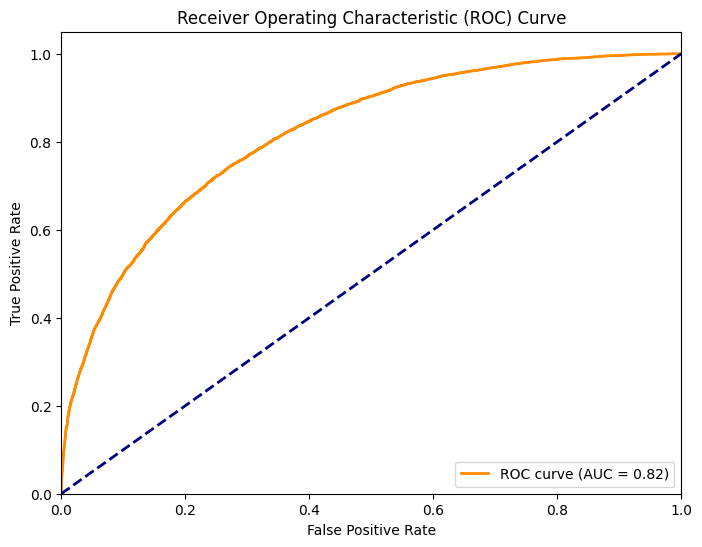

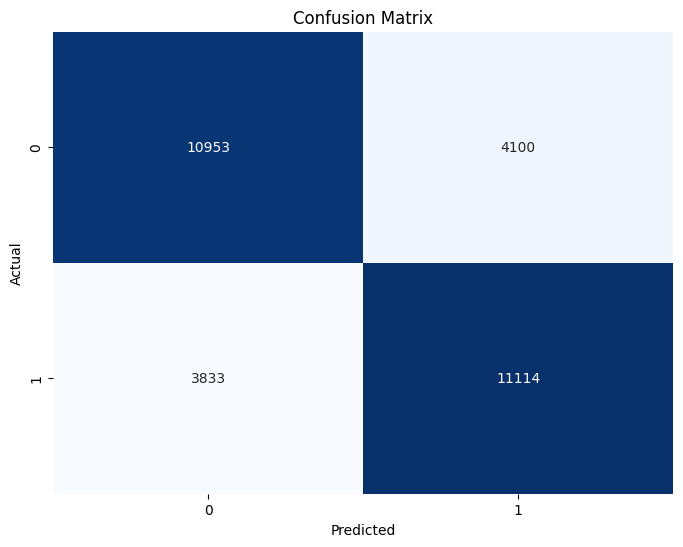

Model saved as gradient_boosting_model.pkl and gradient_boosting_model.joblib


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    jaccard_score, log_loss, cohen_kappa_score, average_precision_score,
    brier_score_loss, fowlkes_mallows_score, matthews_corrcoef, roc_curve, auc,
    confusion_matrix
)
import pickle
from joblib import dump

# Load the dataset
drk = pd.read_csv("D:/Datasets/smoking_driking_dataset_Ver01.csv")
drk1 = drk.drop_duplicates()

# Encode categorical variables
LE = LabelEncoder()
drk1['DRK_YN'] = LE.fit_transform(drk1['DRK_YN'])
drk1['sex'] = LE.fit_transform(drk1['sex'])

# Sample the dataset
seed_value = 42
sample_size = 100000
drk2 = drk1.sample(n=sample_size, random_state=seed_value)

# Define independent and dependent variables
selected_features = ['sex', 'age', 'height', 'waistline', 'HDL_chole', 'LDL_chole', 'hemoglobin', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd']  # Replace with actual selected features
TargetVar = 'DRK_YN'
x = drk2[selected_features]
y = drk2[TargetVar]

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Predict and evaluate
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
jaccard = jaccard_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_prob)
brier_loss = brier_score_loss(y_test, y_pred_prob)
fowlkes_mallows = fowlkes_mallows_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
balanced_accuracy = recall_score(y_test, y_pred, pos_label=1) / 2 + (1 - recall_score(y_test, y_pred, pos_label=0)) / 2
gini = 2 * roc_auc - 1

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Jaccard Index:", jaccard)
print("Logloss:", logloss)
print("Cohen's Kappa:", cohen_kappa)
print("Average Precision:", average_precision)
print("Brier Loss:", brier_loss)
print("Fowlkes-Mallows Index:", fowlkes_mallows)
print("MCC:", mcc)
print("Balanced Accuracy:", balanced_accuracy)
print("Gini Coefficient:", gini)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model as .pkl and .joblib files
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(model, f)

dump(model, 'gradient_boosting_model.joblib')

print("Model saved as gradient_boosting_model.pkl and gradient_boosting_model.joblib")
